# Importing Libraries

In [79]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import plotly.express as px
import plotly.graph_objects as go
import folium
import json

In [2]:
# Setting path
path = r'C:\Users\faisa\Desktop\Data analysis\Data Immersion\Achievement 6'

In [3]:
# importing data set
df_users = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'users_1.0.pkl'))
df_orders = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_1.0.pkl'))
df_events = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'events_1.0.pkl'))
df_products = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'products_1.0.pkl'))
df_order_items = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'order_items_1.0.pkl'))
df_inventory_items = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'inventory_items_1.0.pkl'))
df_distribution_centers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'distribution_centers_1.0.pkl'))

### Testing

In [19]:
df_order.shape

(125226, 9)

In [17]:
df_orders.isnull().sum()

order_id             0
user_id              0
status               0
gender               0
created_at           0
returned_at     112696
shipped_at       43765
delivered_at     81342
num_of_item          0
dtype: int64

In [18]:
df_order_items.isnull().sum()

id                        0
order_id                  0
user_id                   0
product_id                0
inventory_item_id         0
status                    0
created_at                0
shipped_at            63478
delivered_at         117918
returned_at          163527
sale_price                0
dtype: int64

In [20]:
df_order_items.shape

(181759, 11)

# Script

### Merging Dataframes

#### Join distribution centers with products

In [13]:
# combining distribution centers with products
df_products_new = pd.merge(df_products, df_distribution_centers, left_on = 'distribution_center_id', right_on = 'id')

In [21]:
# dropping id_y column
df_products_new1 = df_products_new.drop(columns= ['id_y', 'distribution_center_id'])

In [26]:
# renaming columns
df_products_new2 = df_products_new1.rename(columns={'id_x': 'id', 'name_x': 'product_name', 'name_y':'distribution_center', 'latitude':'distribution_center_latitude', 'longitude':'distribution_center_logitude'})

In [27]:
df_products_new2.columns

Index(['id', 'cost', 'category', 'product_name', 'brand', 'retail_price',
       'department', 'distribution_center', 'distribution_center_latitude',
       'distribution_center_logitude'],
      dtype='object')

In [28]:
df_products_new2.head()

,id,cost,category,product_name,brand,retail_price,department,distribution_center,distribution_center_latitude,distribution_center_logitude
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,Memphis TN,35.1174,-89.9711
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,Memphis TN,35.1174,-89.9711
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,Memphis TN,35.1174,-89.9711
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,Memphis TN,35.1174,-89.9711
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,Memphis TN,35.1174,-89.9711


#### Join Orders dataframe with users

In [47]:
# combining orders with users
df_orders1 = pd.merge(df_orders, df_users, left_on = 'user_id', right_on = 'id')

In [34]:
# delete some columns
df_orders2 = df_orders1.drop(columns=['gender_y', 'id'])

In [37]:
# renaming columns
df_orders3 = df_orders2.rename(columns={'gender_x': 'gender', 'created_at_x': 'order_created_at', 'created_at_y':'user_created_at'})

In [38]:
df_orders3.head(1)

,order_id,user_id,status,gender,order_created_at,returned_at,shipped_at,delivered_at,num_of_item,first_name,last_name,age,state,postal_code,city,country,traffic_source,user_created_at
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3,Vanessa,Ross,52,Piauí,64120-000,União,Brasil,Organic,2020-10-02 10:03:00+00:00


#### Joining Orders with order items

In [57]:
# combining orders with order items
df_orders4 = pd.merge(df_orders3, df_order_items, on='order_id')

In [66]:
# delete some columns
df_orders5 = df_orders4.drop(columns=['user_id_y', 'status_y', 'returned_at_y', 'shipped_at_y','delivered_at_y', 'id'])

In [69]:
# renaming columns
df_orders6 = df_orders5.rename(columns={'user_id_x': 'user_id', 'status_x': 'status', 'returned_at_x':'returned_at', 'shipped_at_x':'shipped_at'
                          , 'delivered_at_x':'delivered_at'})

In [71]:
df_orders6.isnull().sum()

order_id                  0
user_id                   0
status                    0
gender                    0
order_created_at          0
returned_at          163527
shipped_at            63478
delivered_at         117918
num_of_item               0
first_name                0
last_name                 0
age                       0
state                     0
postal_code               0
city                      0
country                   0
traffic_source            0
user_created_at           0
product_id                0
inventory_item_id         0
created_at                0
sale_price                0
dtype: int64

#### Joining Orders with (Products + Distribution Centers)

In [81]:
# combining orders with products and distribution centers
df_orders7 = pd.merge(df_orders6, df_products_new2, left_on='product_id', right_on='id')

In [114]:
# delete some columns
df_orders8 = df_orders7.drop(columns=['id', 'retail_price'])

In [115]:
# renaming columns
df_orders9 = df_orders8.rename(columns={'created_at': 'product_created_at'})

In [91]:
# changing setting to display all columns
pd.set_option('display.max_columns', None)

In [116]:
df_orders9.head()

,order_id,user_id,status,gender,order_created_at,returned_at,shipped_at,delivered_at,num_of_item,first_name,last_name,age,state,postal_code,city,country,traffic_source,user_created_at,product_id,inventory_item_id,product_created_at,sale_price,cost,category,product_name,brand,department,distribution_center,distribution_center_latitude,distribution_center_logitude
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3,Vanessa,Ross,52,Piauí,64120-000,União,Brasil,Organic,2020-10-02 10:03:00+00:00,6998,36,2022-10-22 07:55:58+00:00,15.67,7.44325,Shorts,Grane Supergirl Shorts,Grane,Women,Chicago IL,41.8369,-87.6847
1,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3,Vanessa,Ross,52,Piauí,64120-000,União,Brasil,Organic,2020-10-02 10:03:00+00:00,7173,29,2022-10-20 06:35:35+00:00,24.99,10.47081,Skirts,Woman Within Plus Size Petite flare skirt,Woman Within,Women,New Orleans LA,29.9500,-90.0667
2,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3,Vanessa,Ross,52,Piauí,64120-000,União,Brasil,Organic,2020-10-02 10:03:00+00:00,1488,33,2022-10-24 07:19:09+00:00,24.99,10.89564,Sweaters,LookbookStore Women Coloured Zip Mouth Smile S...,LookbookStore,Women,New Orleans LA,29.9500,-90.0667
3,60,44,Cancelled,F,2023-01-20 02:12:00+00:00,NaN,NaN,NaN,1,Melissa,Whitaker,56,Chung-cheong bukdo,360-100,Cheongju City,South Korea,Search,2022-08-16 02:12:00+00:00,14717,275,2023-01-20 00:35:38+00:00,16.99,6.67707,Maternity,Lace Cami Top and Boxer Shorts Lingerie Set,Angelina Hosiery,Women,Houston TX,29.7604,-95.3698
4,64,46,Cancelled,F,2021-12-06 09:11:00+00:00,NaN,NaN,NaN,1,Linda,White,40,New York,10474,New York,United States,Search,2020-01-07 09:11:00+00:00,9588,287,2021-12-06 06:35:44+00:00,36.00,22.06800,Sleep & Lounge,Calvin Klein Women's Nocturnal Elegance Camisole,Calvin Klein,Women,Houston TX,29.7604,-95.3698


### df_orders9 is a combination of Orders/Users/Products/Order_items/Distribution_centers

### Exercise 6.2

#### Creating Correlation Matrix Heatmap

In [117]:
df_orders9.describe()

,order_id,user_id,num_of_item,age,product_id,inventory_item_id,sale_price,cost,distribution_center_latitude,distribution_center_logitude
count,181759.000000,181759.000000,181759.000000,181759.000000,181759.000000,181759.000000,181759.000000,181759.000000,181759.000000,181759.000000
mean,62579.982609,49983.272020,1.901457,41.063749,15254.151838,245291.860007,59.568544,28.655281,34.923334,-88.515724
std,36125.987285,28830.895739,1.066470,17.032648,8413.482833,141661.912894,66.657262,31.022340,4.423208,11.699646
min,1.000000,1.000000,1.000000,12.000000,1.000000,3.000000,0.020000,0.008300,29.760400,-118.250000
25%,31266.500000,25031.500000,1.000000,26.000000,7979.500000,122565.000000,24.500000,11.366210,30.694400,-90.066700
50%,62529.000000,49983.000000,2.000000,41.000000,15966.000000,245284.000000,39.990002,19.829000,34.050000,-88.043100
75%,93845.500000,74867.500000,2.000000,56.000000,22504.000000,367983.000000,69.949997,34.545320,39.950000,-79.933300
max,125226.000000,100000.000000,4.000000,70.000000,29120.000000,490705.000000,999.000000,557.151002,41.836900,-73.783400


In [119]:
# Picking important columns for the correlation analysis
df_orders_cor1 = df_orders9[['age', 'sale_price', 'cost', 'distribution_center_latitude', 'distribution_center_logitude']]

In [120]:
df_orders_cor1.corr()

,age,sale_price,cost,distribution_center_latitude,distribution_center_logitude
age,1.000000,0.000072,0.000120,0.002212,0.000547
sale_price,0.000072,1.000000,0.982785,-0.035970,-0.006399
cost,0.000120,0.982785,1.000000,-0.034410,-0.001162
distribution_center_latitude,0.002212,-0.035970,-0.034410,1.000000,0.358921
distribution_center_logitude,0.000547,-0.006399,-0.001162,0.358921,1.000000


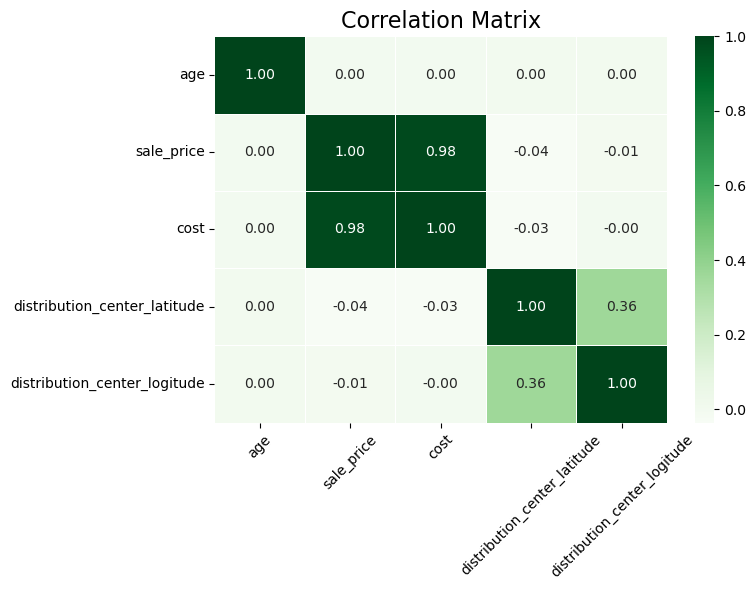

In [121]:
# Create a correlation heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(df_orders_cor1.corr(), annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### There are strong correlations between _Sale price and Cost_ showing that the sale price highly depends on the Cost of making the product.

#### Scatterplots

In [127]:
df_orders_cor2 = df_orders9[['sale_price', 'cost']]

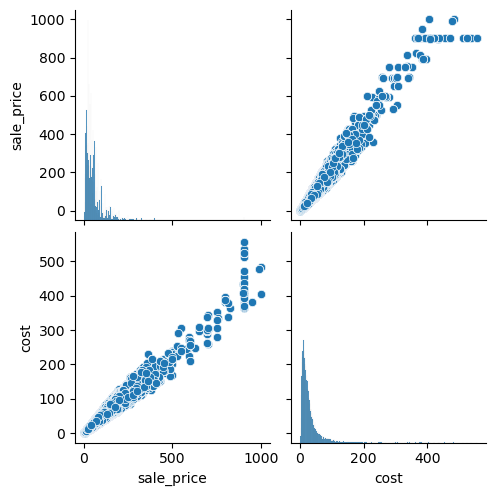

In [128]:
# Creating scatterplot for cost and sale price
scatter1 = sns.pairplot(df_orders_cor2)

##### As seen in the scatter plots of Cost and Sale price; products that cost less are sold at a lower price and vice versa. There are only a few products that are sold with a smaller profit margin than others.

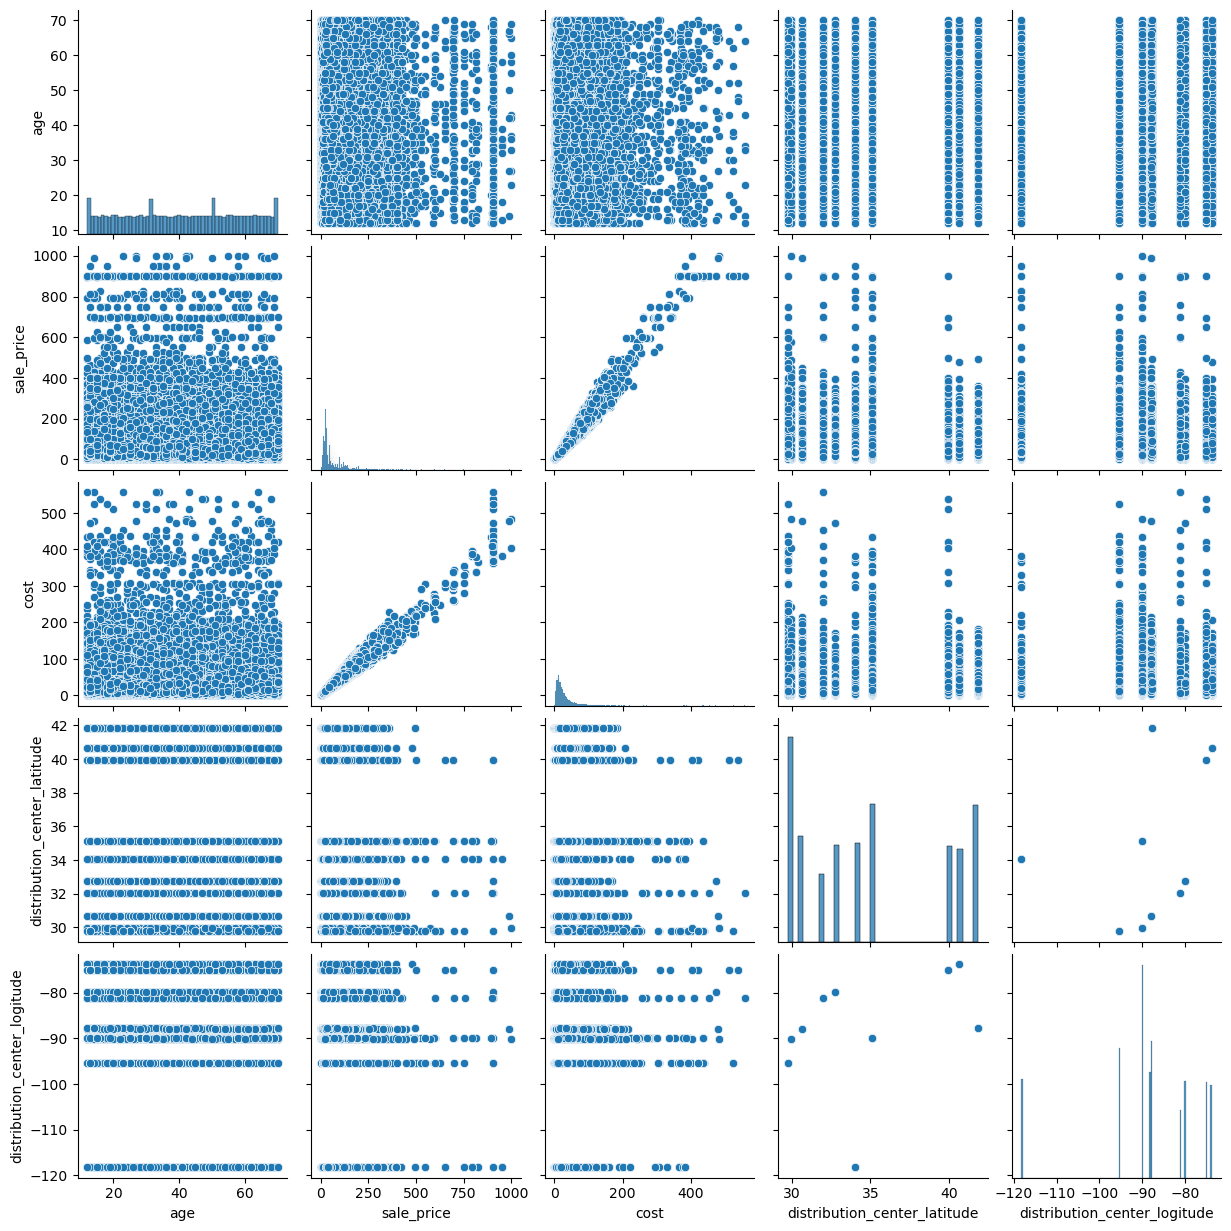

In [126]:
# Creating scatterplot pairs
scatter = sns.pairplot(df_orders_cor1)

##### There is not much to take away from age groups as all age groups spend the same amount.

### Creating a Sale price category

In [137]:
# Assigning column variables
df_orders9.loc[df_orders9['sale_price'] < 100, 'price_category'] = 'Cheap'
df_orders9.loc[(df_orders9['sale_price'] >= 100) & (df_orders9['sale_price'] < 500), 'price_category'] = 'Medium'
df_orders9.loc[df_orders9['sale_price'] > 500, 'price_category'] = 'Luxury'

In [138]:
df_orders9['price_category'].value_counts()

price_category
Cheap     156429
Medium     24880
Luxury       450
Name: count, dtype: int64

In [139]:
df_orders9.columns

Index(['order_id', 'user_id', 'status', 'gender', 'order_created_at',
       'returned_at', 'shipped_at', 'delivered_at', 'num_of_item',
       'first_name', 'last_name', 'age', 'state', 'postal_code', 'city',
       'country', 'traffic_source', 'user_created_at', 'product_id',
       'inventory_item_id', 'product_created_at', 'sale_price', 'cost',
       'category', 'product_name', 'brand', 'department',
       'distribution_center', 'distribution_center_latitude',
       'distribution_center_logitude', 'price_category'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Chicago IL'),
  Text(1, 0, 'New Orleans LA'),
  Text(2, 0, 'Houston TX'),
  Text(3, 0, 'Philadelphia PA'),
  Text(4, 0, 'Port Authority of New York/New Jersey NY/NJ'),
  Text(5, 0, 'Memphis TN'),
  Text(6, 0, 'Mobile AL'),
  Text(7, 0, 'Charleston SC'),
  Text(8, 0, 'Los Angeles CA'),
  Text(9, 0, 'Savannah GA')])

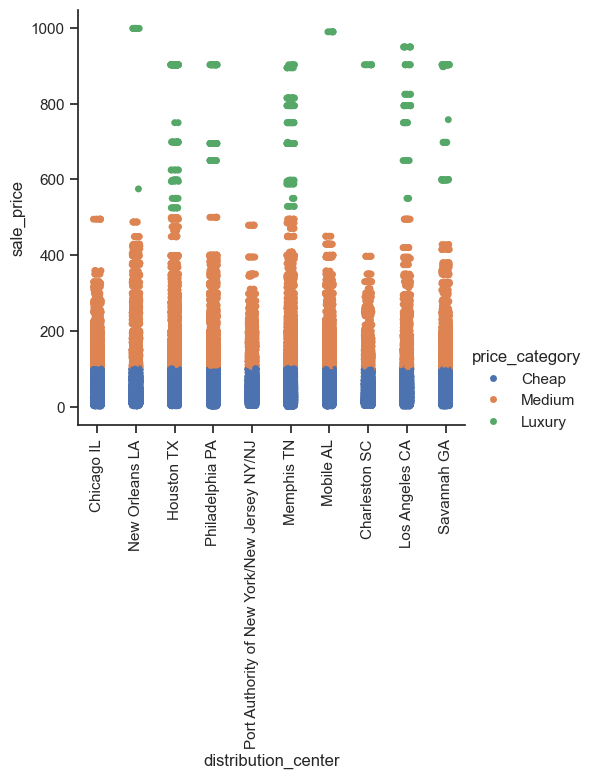

In [143]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
scatter3 = sns.catplot(x="distribution_center", y="sale_price", hue="price_category", data=df_orders9)
plt.xticks(rotation=90)

##### According to the Scatterplot there is no interest in Luxury items that cost more than $500 in Chicago and New York/New Jersey Distribution centers.

### Creating Country Column

In [73]:
# filling country data based on state_to_country data map created customer behavior tab
df_orders9['country'] = df_orders9['state'].map(state_to_country).fillna('Unknown')

### Creating Profit Colum

In [185]:
# create profit column
df_orders9.loc[df_orders9['returned_at'].isnull(), 'profit'] = df_orders9['sale_price']-df_orders9['cost']

## Business Questions

### What are the top selling products by order and revenue?

In [161]:
df_revenue_orders = df_orders9.groupby(['product_name', 'department']).agg(
    revenue=('sale_price', 'sum')).reset_index().sort_values(
    by='revenue', ascending= False).head(10)

In [162]:
df_revenue_orders

,product_name,department,revenue
23787,The North Face Apex Bionic Soft Shell Jacket -...,Men,23478.00000
17585,NIKE WOMEN'S PRO COMPRESSION SPORTS BRA *Outst...,Women,16254.00000
5452,Canada Goose Men's The Chateau Jacket,Men,15485.00000
5459,Canada Goose Women's Solaris,Women,13900.00000
23786,The North Face Apex Bionic Mens Soft Shell Ski...,Men,13545.00000
5458,Canada Goose Women's Mystique,Women,12000.00000
18245,Nobis Merideth Parka,Women,11130.00000
23791,The North Face Denali Down Womens Jacket 2013,Women,10836.00000
24656,True Religion Men's Ricky Straight Jean,Men,9471.55011
8048,Diesel Men's Shioner Skinny Straight Leg Jean,Men,9175.34996


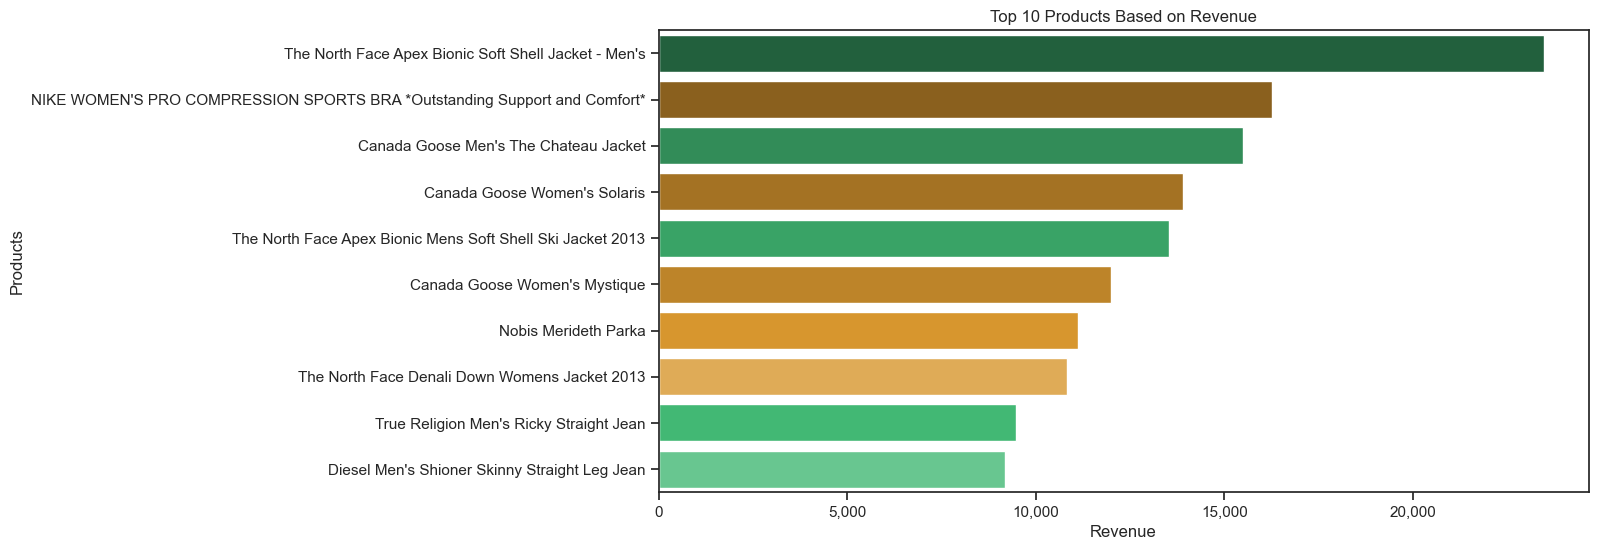

In [169]:
# visualizing top 10 products based on revenue
plt.figure(figsize=(12, 6))
color=['#186a3b','#9c640c','#239b56', '#b9770e', '#28b463', '#d68910', '#f39c12', '#f5b041','#2ecc71','#58d68d']
bar_revenue = sns.barplot(data=df_revenue_orders, x='revenue', y='product_name', palette = color, hue = 'product_name')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel("Products")
plt.xlabel("Revenue")
plt.title("Top 10 Products Based on Revenue")
# exporting the visualization
plt.savefig(os.path.join(path, '04 Analysis', 'visualizations', 'top 10 products.png'), dpi=300, bbox_inches='tight')

In [170]:
df_orders_volume = df_orders9.groupby(['product_name', 'department']).agg(
    volume=('product_name', 'count')).reset_index().sort_values(
    by='volume', ascending= False).head(10)

In [171]:
df_orders_volume

,product_name,department,volume
26679,Wrangler Men's Premium Performance Cowboy Cut ...,Men,62
20192,Puma Men's Socks,Men,48
470,7 For All Mankind Men's Standard Classic Strai...,Men,41
24656,True Religion Men's Ricky Straight Jean,Men,37
13977,Kenneth Cole Men's Straight Leg Jean,Men,36
16838,Michael Kors Men's 3 Pack Brief,Men,33
10992,HUGO BOSS Men's Long Pant,Men,31
15601,Lucky Brand Mens Men's 361 Vintage Straight De...,Men,31
8048,Diesel Men's Shioner Skinny Straight Leg Jean,Men,31
15020,Levi's Juniors' Demi Curve ID Skinny Jean,Women,30


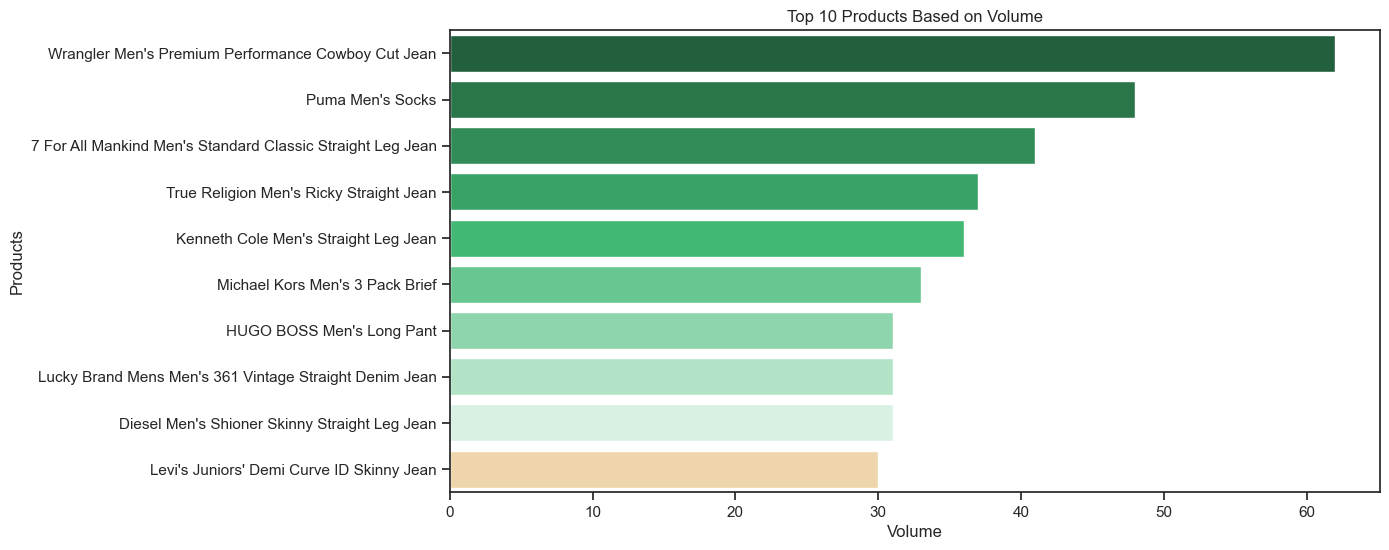

In [174]:
# visualizing top 10 products based on volume
plt.figure(figsize=(12, 6))
color=['#186a3b','#1d8348','#239b56', '#28b463', '#2ecc71', '#58d68d', '#82e0aa', '#abebc6','#d5f5e3','#fad7a0']
bar_volume = sns.barplot(data=df_orders_volume, x='volume', y='product_name', palette = color, hue = 'product_name')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel("Products")
plt.xlabel("Volume")
plt.title("Top 10 Products Based on Volume")
# exporting the visualization
plt.savefig(os.path.join(path, '04 Analysis', 'visualizations', 'top 10 products volume.png'), dpi=300, bbox_inches='tight')

### How has revenue trended over time?

In [212]:
# Creating order created month
df_orders9['order_date'] = pd.to_datetime(df_orders9['order_created_at'], format='ISO8601').dt.to_period('M').astype(str)

C:\Users\faisa\AppData\Local\Temp\ipykernel_7016\3454874223.py:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [213]:
df_orders9[['sale_price', 'order_date']].head(5)

,sale_price,order_date
0,15.67,2022-10
1,24.99,2022-10
2,24.99,2022-10
3,16.99,2023-01
4,36.00,2021-12


In [214]:
df_revenue_time = df_orders9.groupby(['order_date']).agg(
    revenue=('sale_price', 'sum')).reset_index().sort_values(
    by='revenue', ascending= False)

In [215]:
df_revenue_time

,order_date,revenue
60,2024-01,797741.190944
59,2023-12,726339.010560
58,2023-11,588526.200546
57,2023-10,544667.370469
56,2023-09,481816.500582
...,...,...
4,2019-05,14883.059994
3,2019-04,10614.860044
2,2019-03,7954.160018
1,2019-02,4125.010007


In [216]:
# converting order date back to dateframe
df_revenue_time['order_date'] = pd.to_datetime(df_revenue_time['order_date'])

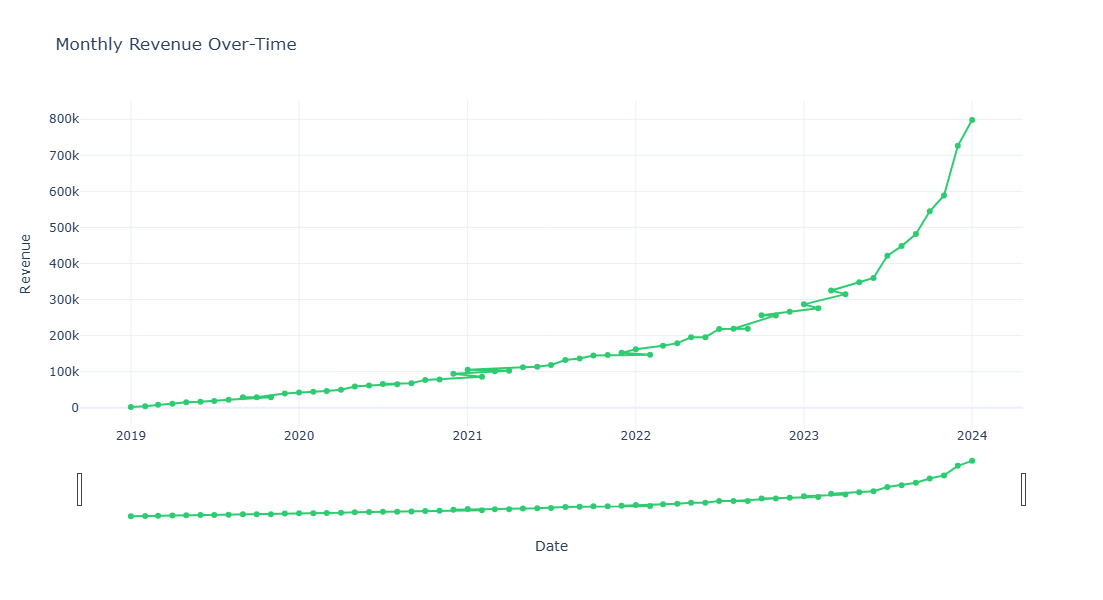

In [223]:
fig = px.line(df_revenue_time, x='order_date', y='revenue',
              title='Monthly Revenue Over-Time',
              labels={'order_date': 'Month', 'revenue': 'Revenue'},
              template='plotly_white',
              color_discrete_sequence=['#2ecc71']
             )

fig.update_traces(mode='lines+markers')
fig.update_layout(xaxis_title='Date', yaxis_title='Revenue',
                  xaxis_rangeslider_visible=True,
                    height=600,
                    width=1000 
)

fig.show()

### What are the most successful traffic source to purchase?


In [231]:
df_source = df_orders9[['traffic_source', 'order_date']]

In [233]:
# Chaning order_date to datetime
df_source['order_date'] = pd.to_datetime(df_source['order_date'])

C:\Users\faisa\AppData\Local\Temp\ipykernel_7016\3333072194.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [234]:
# grouping traffic source and order date count
df_traffic_counts = df_source.groupby([
    df_source['order_date'].dt.to_period('M'), 'traffic_source']).size().reset_index(name='count')

In [235]:
# Convert order_date back to datetime
df_traffic_counts['order_date'] = df_traffic_counts['order_date'].dt.to_timestamp()

In [236]:
# creating a column for each dataframe
df_pivot = df_traffic_counts.pivot(index='order_date', columns='traffic_source', values='count').fillna(0)

In [238]:
df_pivot.head()

traffic_source,Display,Email,Facebook,Organic,Search
order_date,,,,,
2019-01-01,1.0,0.0,1.0,4.0,27.0
2019-02-01,3.0,2.0,3.0,8.0,40.0
2019-03-01,9.0,3.0,4.0,25.0,82.0
2019-04-01,2.0,19.0,16.0,22.0,111.0
2019-05-01,12.0,17.0,12.0,31.0,161.0


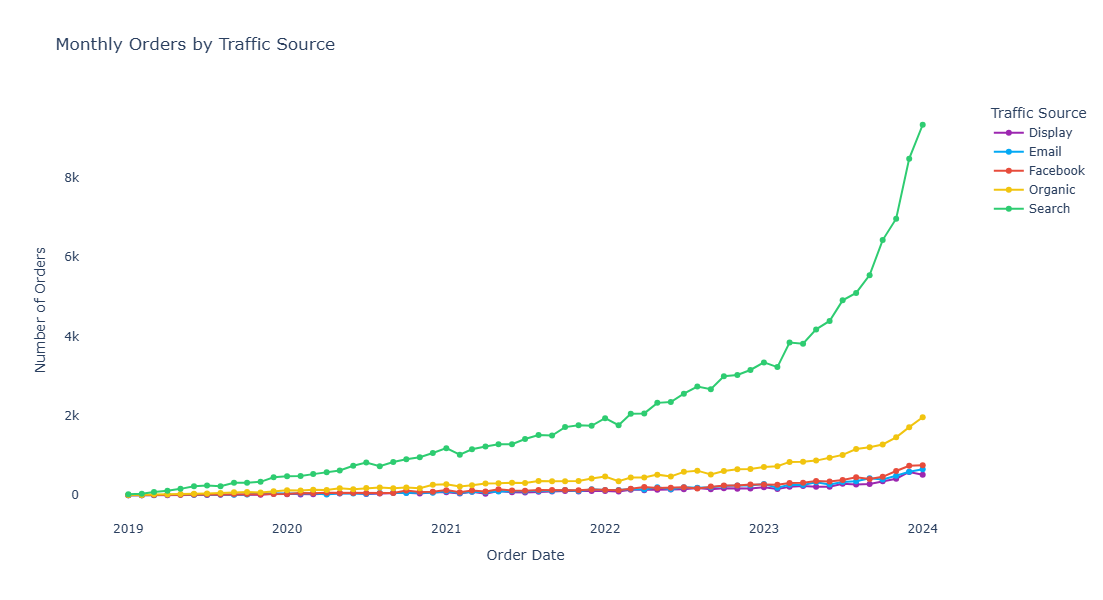

In [245]:
# Interactive Visualization
fig = go.Figure()

colors = ['#9c27b0', '#03a9f4', '#e74c3c', '#f1c40f', '#2ecc71']  # Customize as needed

for i, source in enumerate(df_pivot.columns):
    fig.add_trace(go.Scatter(
        x=df_pivot.index,
        y=df_pivot[source],
        mode='lines+markers',
        name=source,
        line=dict(color=colors[i % len(colors)], width=2),
        connectgaps=True
    ))

# Style
fig.update_layout(
    title="Monthly Orders by Traffic Source",
    xaxis_title="Order Date",
    yaxis_title="Number of Orders",
    plot_bgcolor='white',
    width=1000,
    height=600,
    legend_title="Traffic Source"
)

fig.show()

###  What is the average delivery time by region?

In [61]:
df_orders9['distribution_center'].value_counts()

distribution_center
Memphis TN                                     24139
Chicago IL                                     23952
Houston TX                                     22722
Mobile AL                                      18556
Los Angeles CA                                 17294
Charleston SC                                  16907
Philadelphia PA                                16764
Port Authority of New York/New Jersey NY/NJ    16276
New Orleans LA                                 13221
Savannah GA                                    11928
Name: count, dtype: int64

In [22]:
# changing string to datetime
df_orders9['delivered_at'] = pd.to_datetime(df_orders9['delivered_at'], errors='coerce')
df_orders9['order_created_at'] = pd.to_datetime(df_orders9['order_created_at'], errors='coerce')
df_orders9['shipped_at'] = pd.to_datetime(df_orders9['shipped_at'], errors='coerce')

In [42]:
# Creating delivery time column
df_orders9['delivery_time'] = df_orders9['delivered_at'] - df_orders9['order_created_at']

In [43]:
# Creating processing time column
df_orders9['processing_time'] = df_orders9['shipped_at'] - df_orders9['order_created_at']

In [46]:
# Creating order_weekday column
df_orders9['order_weekday'] = df_orders9['order_created_at'].dt.day_name()

In [44]:
# keeping days only
df_orders9['processing_time'] = df_orders9['processing_time'].dt.days

In [45]:
df_orders9['delivery_time'] = df_orders9['delivery_time'].dt.days

In [68]:
# creating heatmap data
order_heatmap_data = df_orders9.pivot_table(
    index='distribution_center',
    values=['processing_time', 'delivery_time'],
    aggfunc='mean'
).reindex(['Memphis TN', 'Chicago IL', 'Houston TX', 'Mobile AL', 'Los Angeles CA', 'Charleston SC', 'Philadelphia PA', 'Port Authority of New York/New Jersey NY/NJ',
          'New Orleans LA', 'Savannah GA'])

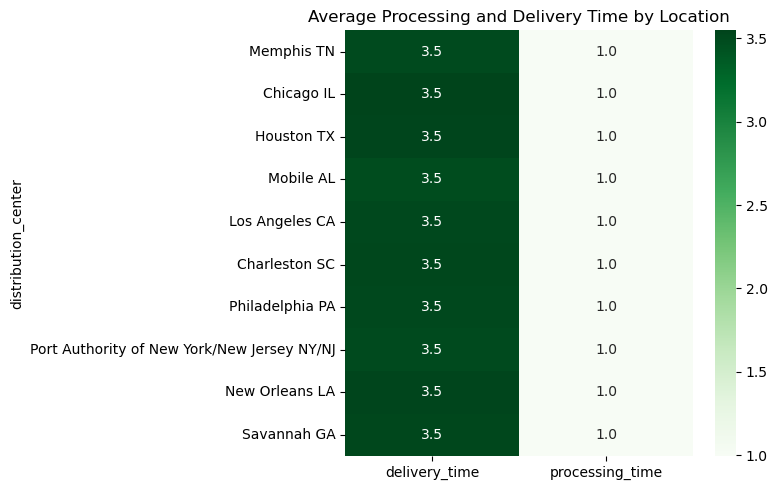

In [71]:
plt.figure(figsize=(8, 5))
sns.heatmap(order_heatmap_data, annot=True, fmt=".1f", cmap='Greens')
plt.title('Average Processing and Delivery Time by Location')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'visualizations', 'average processing and delivery.png'), dpi=300, bbox_inches='tight')
plt.show()

#### There seems to be little to no difference in the delivery time and processing based on different Locations

### What is the ratio of Shipped/Completed/Processing/Canceled/Returned orders?

In [75]:
order_status = df_orders9['status'].value_counts().reset_index()

In [77]:
order_status

,status,count
0,Shipped,54440
1,Complete,45609
2,Processing,36388
3,Cancelled,27090
4,Returned,18232


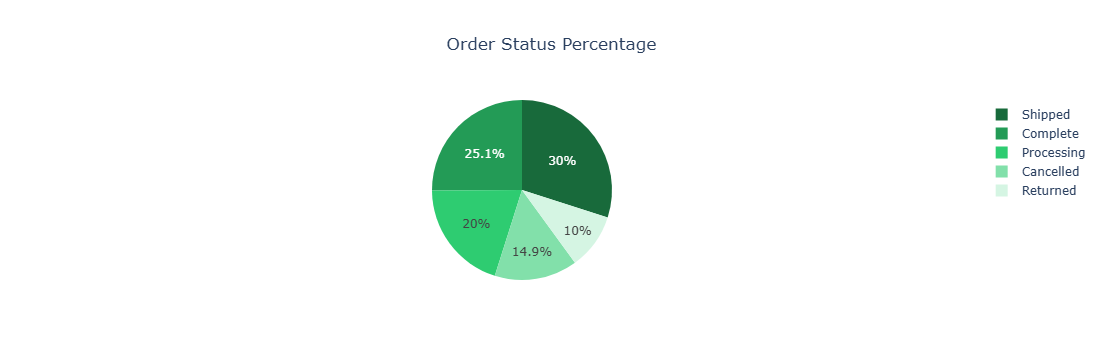

In [91]:
green_colors = ['#186a3b', '#239b56', '#2ecc71', '#82e0aa', '#d5f5e3', '#eafaf1']
fig = px.pie(order_status, values='count', names='status', title='Order Status Percentage', color_discrete_sequence= green_colors)
fig.update_layout(title={'x': 0.5, 'xanchor': 'center'},)
fig.show()

### Customer Behaviors

In [6]:
df_events.head()

,id,user_id,created_at,city,state,postal_code,browser,traffic_source,uri,event_type
0,2198523,NaN,2021-06-17 17:30:00+00:00,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel
1,1773216,NaN,2020-08-07 08:41:00+00:00,Santa Isabel,São Paulo,07500-000,Safari,Adwords,/cancel,cancel
2,2380515,NaN,2021-02-15 18:48:00+00:00,Mairiporã,São Paulo,07600-000,IE,Adwords,/cancel,cancel
3,2250597,NaN,2022-03-30 10:56:00+00:00,Cajamar,São Paulo,07750-000,Chrome,Adwords,/cancel,cancel
4,1834446,NaN,2019-09-05 01:18:00+00:00,São Paulo,São Paulo,09581-680,Chrome,Email,/cancel,cancel


In [117]:
df_events['state'].dropna().unique()

array(['São Paulo', 'Grand Est', 'Beijing', 'New York', 'Tokyo',
       'Liaoning', 'Sachsen', 'Andalucía', 'Brussels', 'Seoul',
       'Comunidad Valenciana', 'Wallonia', 'Jilin',
       "Provence-Alpes-Côte d'Azur", 'Castilla-La Mancha', 'Normandie',
       'Inner Mongolia Autonomous Region', 'Heilongjiang', 'Galicia',
       'Brandenburg', 'Pennsylvania', 'Cataluña', 'Nouvelle-Aquitaine',
       'Flanders', 'Shanghai', 'District of Columbia', 'Corse',
       'Virginia', 'Rio de Janeiro', 'Maryland', 'Kanagawa', 'Jiangsu',
       'New South Wales', 'Massachusetts', 'Anhui', 'Shandong',
       'Schleswig-Holstein', 'Bourgogne-Franche-Comté', 'Chiba',
       'North Carolina', 'Comunidad de Madrid', 'Bremen', 'Rhode Island',
       'Espírito Santo', 'South Carolina', 'Niedersachsen',
       'Región de Murcia', 'Tianjin', 'Georgia', 'Shanxi', 'Daejeon',
       'Victoria', 'Zhejiang', 'New Hampshire', 'Occitanie', 'Florida',
       'Minas Gerais', 'Chungcheongnam-do', 'Nordrhein-Westfalen

In [27]:
# create country column based on states
state_to_country = {
    # Brazil
    'São Paulo': 'Brazil', 'Rio de Janeiro': 'Brazil', 'Espírito Santo': 'Brazil',
    'Minas Gerais': 'Brazil', 'Bahia': 'Brazil', 'Sergipe': 'Brazil',
    'Pernambuco': 'Brazil', 'Alagoas': 'Brazil', 'Paraíba': 'Brazil',
    'Rio Grande do Norte': 'Brazil', 'Ceará': 'Brazil', 'Distrito Federal': 'Brazil',
    'Maranhão': 'Brazil', 'Goiás': 'Brazil', 'Tocantins': 'Brazil',
    'Mato Grosso': 'Brazil', 'Mato Grosso do Sul': 'Brazil', 'Paraná': 'Brazil',
    'Santa Catarina': 'Brazil', 'Rio Grande do Sul': 'Brazil',
    'Amazonas': 'Brazil', 'Amapá': 'Brazil', 'Acre': 'Brazil',
    'Rondônia': 'Brazil', 'Roraima': 'Brazil', 'Pará': 'Brazil',

    # France
    'Île-de-France': 'France', 'Provence-Alpes-Côte d\'Azur': 'France',
    'Grand Est': 'France', 'Normandie': 'France', 'Nouvelle-Aquitaine': 'France',
    'Corse': 'France', 'Bourgogne-Franche-Comté': 'France',
    'Centre-Val de Loire': 'France', 'Occitanie': 'France',
    'Auvergne-Rhône-Alpes': 'France', 'Pays de la Loire': 'France',
    'Hauts-de-France': 'France', 'Bretagne': 'France',

    # China
    'Beijing': 'China', 'Liaoning': 'China', 'Inner Mongolia Autonomous Region': 'China',
    'Heilongjiang': 'China', 'Jilin': 'China', 'Shanghai': 'China',
    'Tianjin': 'China', 'Shanxi': 'China', 'Shandong': 'China',
    'Jiangsu': 'China', 'Anhui': 'China', 'Zhejiang': 'China',
    'Fujian': 'China', 'Jiangxi': 'China', 'Henan': 'China',
    'Hubei': 'China', 'Hunan': 'China', 'Guangdong': 'China',
    'Guangxi Zhuang Autonomous Region': 'China', 'Hainan': 'China',
    'Chongqing': 'China', 'Sichuan': 'China', 'Guizhou': 'China',
    'Yunnan': 'China', 'Shaanxi': 'China', 'Gansu province': 'China',
    'Qinghai': 'China', 'Xinjiang Uygur Autonomous Region': 'China',
    'Ningxia Hui Autonomous Region': 'China',

    # USA
    'New York': 'USA', 'California': 'USA', 'Florida': 'USA', 'Texas': 'USA',
    'Virginia': 'USA', 'Maryland': 'USA', 'Massachusetts': 'USA',
    'North Carolina': 'USA', 'Rhode Island': 'USA', 'Georgia': 'USA',
    'New Hampshire': 'USA', 'Alabama': 'USA', 'Tennessee': 'USA',
    'Kentucky': 'USA', 'Ohio': 'USA', 'Indiana': 'USA', 'Michigan': 'USA',
    'Illinois': 'USA', 'Iowa': 'USA', 'Wisconsin': 'USA', 'Minnesota': 'USA',
    'Montana': 'USA', 'South Carolina': 'USA', 'Pennsylvania': 'USA',
    'Connecticut': 'USA', 'Louisiana': 'USA', 'Arkansas': 'USA',
    'Oklahoma': 'USA', 'Colorado': 'USA', 'Wyoming': 'USA',
    'Idaho': 'USA', 'Utah': 'USA', 'Arizona': 'USA', 'New Mexico': 'USA',
    'Nevada': 'USA', 'Oregon': 'USA', 'Washington': 'USA', 'Maine': 'USA',
    'Vermont': 'USA', 'South Dakota': 'USA', 'North Dakota': 'USA',
    'Nebraska': 'USA', 'Kansas': 'USA', 'New Jersey': 'USA',
    'Missouri': 'USA', 'Mississippi': 'USA', 'Delaware': 'USA',
    'West Virginia': 'USA', 'District of Columbia': 'USA', 'Hawaii': 'USA',
    'Alaska': 'USA',

    # Germany
    'Bayern': 'Germany', 'Sachsen': 'Germany', 'Brandenburg': 'Germany',
    'Bremen': 'Germany', 'Schleswig-Holstein': 'Germany',
    'Niedersachsen': 'Germany', 'Nordrhein-Westfalen': 'Germany',
    'Sachsen-Anhalt': 'Germany', 'Thüringen': 'Germany',
    'Rheinland-Pfalz': 'Germany', 'Hessen': 'Germany',
    'Saarland': 'Germany', 'Berlin': 'Germany', 'Hamburg': 'Germany',
    'Mecklenburg-Vorpommern': 'Germany',

    # Spain
    'Andalucía': 'Spain', 'Comunidad Valenciana': 'Spain',
    'Cataluña': 'Spain', 'Castilla-La Mancha': 'Spain',
    'Galicia': 'Spain', 'Comunidad de Madrid': 'Spain',
    'Región de Murcia': 'Spain', 'Principado de Asturias': 'Spain',
    'País Vasco': 'Spain', 'Extremadura': 'Spain',
    'Islas Baleares': 'Spain', 'La Rioja': 'Spain',
    'Castilla y León': 'Spain', 'Ceuta': 'Spain', 'Melilla': 'Spain',
    'Aragón': 'Spain', 'Cantabria': 'Spain', 'Navarra': 'Spain',

    # Belgium
    'Brussels': 'Belgium', 'Wallonia': 'Belgium', 'Flanders': 'Belgium',

    # South Korea
    'Seoul': 'South Korea', 'Daejeon': 'South Korea',
    'Chungcheongnam-do': 'South Korea', 'Chung-cheong bukdo': 'South Korea',
    'Gyeonggi-do': 'South Korea', 'Gyeongsangnam-do': 'South Korea',
    'Gyeongsangbuk-do': 'South Korea', 'Jeollanam-do': 'South Korea',
    'Jeollabuk do': 'South Korea', 'Jeju Special Self-Governing Province': 'South Korea',
    'Busan': 'South Korea', 'Ulsan Metropolitan City': 'South Korea',
    'Incheon Metropolitan City': 'South Korea', 'Gwangju': 'South Korea',
    'Gangwon-do': 'South Korea',

    # Japan
    'Tokyo': 'Japan', 'Kanagawa': 'Japan', 'Osaka': 'Japan', 'Chiba': 'Japan',
    'Hokkaido': 'Japan', 'Fukuoka': 'Japan', 'Hyogo': 'Japan', 'Kyoto': 'Japan',
    'Shizuoka': 'Japan', 'Aichi': 'Japan', 'Ibaraki': 'Japan', 'Nagano': 'Japan',
    'Gifu': 'Japan', 'Shiga': 'Japan', 'Oita': 'Japan', 'Okinawa': 'Japan',
    'Yamaguchi': 'Japan', 'Kumamoto': 'Japan', 'Okayama': 'Japan', 'Miyagi': 'Japan',
    'Gunma': 'Japan', 'Wakayama': 'Japan', 'Miyazaki': 'Japan', 'Kagoshima': 'Japan',
    'Fukushima': 'Japan', 'Yamanashi': 'Japan', 'Akita': 'Japan', 'Kochi': 'Japan',
    'Nagasaki': 'Japan', 'Tochigi': 'Japan', 'Kagawa': 'Japan', 'Iwate': 'Japan',
    'Nara': 'Japan', 'Mie': 'Japan', 'Shimane': 'Japan', 'Aomori': 'Japan',

    # Australia
    'New South Wales': 'Australia', 'Victoria': 'Australia',
    'Queensland': 'Australia', 'Western Australia': 'Australia',
    'South Australia': 'Australia', 'Tasmania': 'Australia',
    'Northern Territory': 'Australia', 'Australian Capital Territory': 'Australia',

    # UK
    'England': 'UK', 'Scotland': 'UK', 'Wales': 'UK', 'Northern Ireland': 'UK',

    # Austria
    'Vorarlberg': 'Austria',

    # Poland
    'Dolnośląskie': 'Poland', 'Lubuskie': 'Poland', 'Zachodniopomorskie': 'Poland',

    # Nepal
    'Bagmati region': 'Nepal',

    # Remote
    'Remote territory': 'China',
        'Canarias': 'Spain',
    'Saitama': 'Japan',
    'Hebei': 'China',
    'Piauí': 'Brazil',
    'Daegu Metropolitan City': 'South Korea',
    'Baden-Württemberg': 'Germany',
    'Hiroshima': 'Japan'
}


In [28]:
df_events['country'] = df_events['state'].map(state_to_country).fillna('Unknown')

In [29]:
df_events[df_events['country'] == 'Other']['city'].unique()

array([], dtype=object)

In [30]:
df_events['country'].value_counts()

country
China          835115
USA            542930
Brazil         352819
South Korea    128158
France         114594
UK             111667
Germany        103240
Spain           97198
Japan           59084
Australia       51628
Belgium         28860
Poland           6041
Nepal             577
Austria            52
Name: count, dtype: int64

#### Most popular browser choice

In [98]:
browser_choice = df_events['browser'].value_counts().reset_index()

In [99]:
browser_choice

,browser,count
0,Chrome,1218687
1,Firefox,487490
2,Safari,483743
3,IE,121551
4,Other,120492


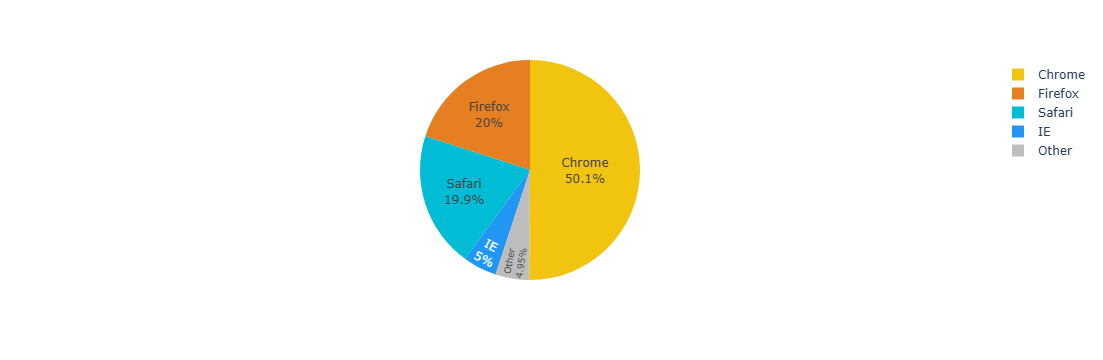

In [105]:
fig = px.pie(browser_choice, values='count', names='browser', color='browser',
             color_discrete_map={'Chrome':'#f1c40f',
                                 'Firefox':'#e67e22',
                                 'Safari':'#00bcd4',
                                 'IE':'#2196f3',
                                'Other':'#bdbdbd'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#### Successful Traffic source

In [58]:
traffic_purchase1 = (df_events[df_events['event_type'] == 'purchase']
    .groupby(['traffic_source', 'country'])
    .size()
    .reset_index(name='count'))

In [59]:
country_totals = (traffic_purchase.groupby('country')['count']
    .sum()
    .reset_index(name='total_country_count'))

In [60]:
traffic_purchase = traffic_purchase.merge(country_totals, on='country')

In [64]:
traffic_purchase_sorted = traffic_purchase.sort_values(
    by=['total_country_count', 'count'],
    ascending=[True, True])

In [65]:
traffic_purchase_sorted

,traffic_source,country,count,total_country_count
1,Email,Austria,2,2
0,Organic,Nepal,1,48
2,Facebook,Nepal,2,48
3,YouTube,Nepal,3,48
4,Adwords,Nepal,14,48
...,...,...,...,...
50,Organic,China,3161,62660
58,YouTube,China,6083,62660
59,Facebook,China,6305,62660
64,Adwords,China,18802,62660


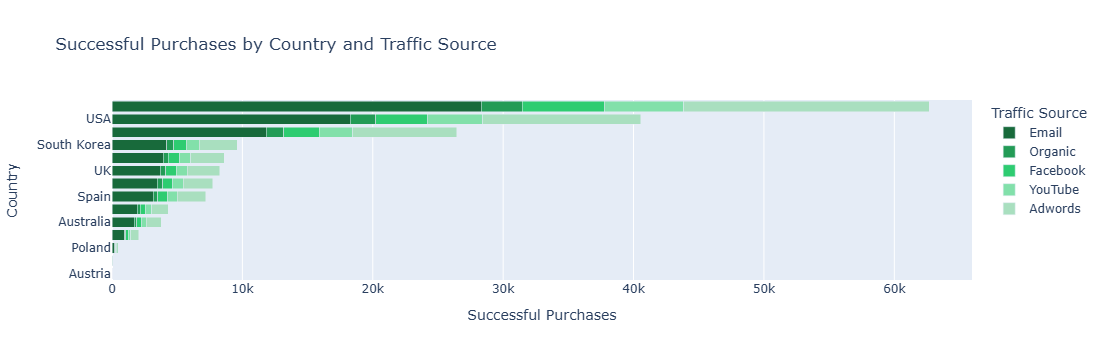

In [69]:
custom_colors = ['#186a3b', '#239b56', '#2ecc71', '#82e0aa', '#a9dfbf']
fig = px.bar(
    traffic_purchase_sorted,
    x='count',
    y='country',
    color='traffic_source',
    title='Successful Purchases by Country and Traffic Source',
    color_discrete_sequence=custom_colors
)

fig.update_layout(
    xaxis_title='Successful Purchases',
    yaxis_title='Country',
    barmode='stack',
    legend_title='Traffic Source',
    height=800
)
fig.show()

#### As seen in the chart above, the most successful sources of traffic is seen to be email followed by adwords. 

## Hypothesis:
#### Null Hypothesis: New marketing strategies have higher success rate then outdated marketing strategies.
#### Alternative Hypothesis: Outdated marketing campaigns perform better than new marketing strategies.


## Exporting the data

In [74]:
df_orders9.to_pickle(os.path.join(path, '02 Data', 'prepared data', 'combined dataframe 1.1.pkl'))

In [75]:
df_events.to_pickle(os.path.join(path, '02 Data', 'prepared data', 'events 1.0.pkl'))